In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [15]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Zad
Proszę narysować dane za pomoca 
```python
sns.pairplot()
```

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

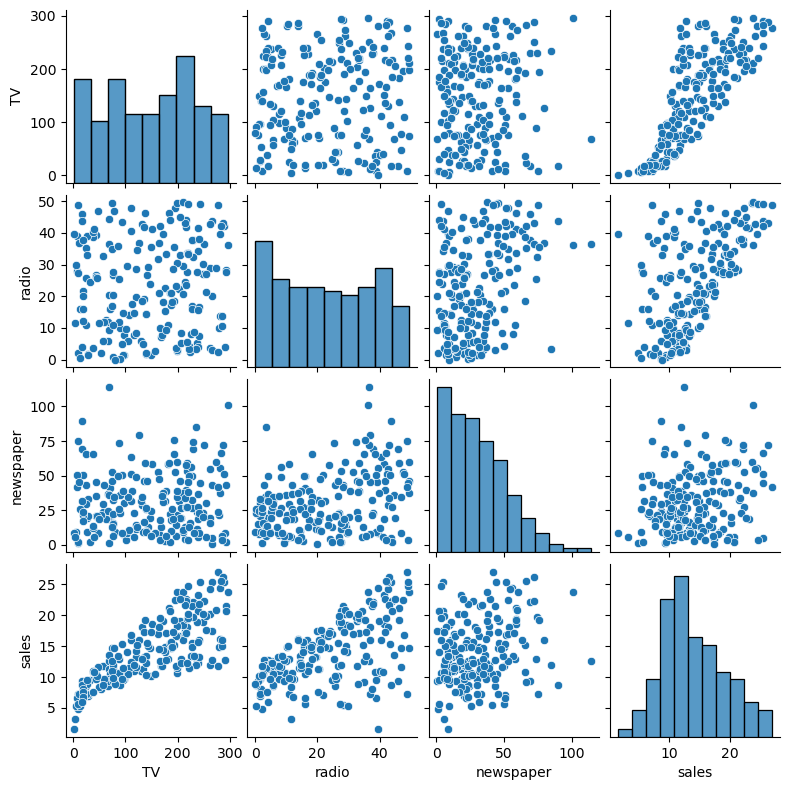

In [27]:
sns.pairplot(df_adv, height=2);

# Zad
Proszę wyrysować dane za pomoca 
```python
sns.heatmap()
```

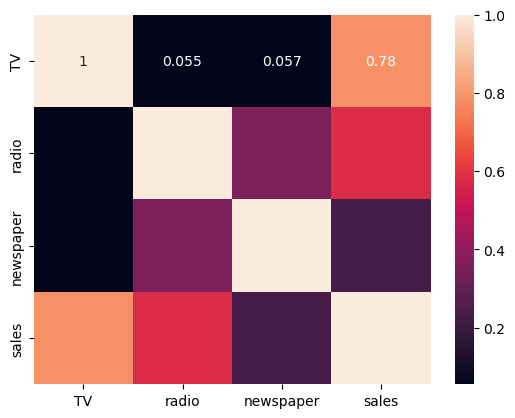

In [34]:
sns.heatmap(df_adv.corr(), annot=True);

# Zadanie 1 - Konkurs
Wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.


In [62]:
est = smf.ols(formula='sales ~ I(TV) + I(TV ** 2) + I(radio)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.915    
Dependent Variable: sales            AIC:                738.3171 
Date:               2024-04-10 15:50 BIC:                751.5104 
No. Observations:   200              Log-Likelihood:     -365.16  
Df Model:           3                F-statistic:        719.0    
Df Residuals:       196              Prob (F-statistic): 1.80e-105
R-squared:          0.917            Scale:              2.3023   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       1.2876    0.3588   3.5882  0.0004   0.5799   1.9953
I(TV)           0.0784    0.0050  15.7357  0.0000   0.0686   0.0883
I(TV ** 2)     -0.0001    0.0000  -6.7745  0.0000  -0.0001  -0.0001
I(radio)        0.1930    0.0073  26.4646  0.0000   0.1786   0.2074
------

In [9]:
# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ I(newspaper)+I(TV):I(radio)+np.log(radio+1)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: sales            AIC:                685.7094 
Date:               2020-03-26 13:22 BIC:                698.9027 
No. Observations:   200              Log-Likelihood:     -338.85  
Df Model:           3                F-statistic:        955.0    
Df Residuals:       196              Prob (F-statistic): 1.16e-116
R-squared:          0.936            Scale:              1.7698   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          10.1955   0.3396 30.0181 0.0000  9.5257 10.8653
I(newspaper)        0.0003   0.0046  0.0574 0.9543 -0.0087  0.0093
I(TV):I(radio)      0.0016   0.0000 44.3924 0.0000  0.0015  0.0017
np.log(radio + 1)  -0.6088   0.1356 -4.4884 0.0000 -0.8763 -0.3413
-------------

In [41]:
est = smf.ols(formula='sales ~ I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()
print((est.summary2()))

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.968    
Dependent Variable:     sales              AIC:                  550.9065 
Date:                   2024-04-10 15:42   BIC:                  577.2930 
No. Observations:       200                Log-Likelihood:       -267.45  
Df Model:               7                  F-statistic:          847.3    
Df Residuals:           192                Prob (F-statistic):   1.16e-140
R-squared:              0.969              Scale:                0.88469  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    6.5559   0.4655 14.0825 0.0000  5.6377 7.4741
I(newspaper)                 0.0131   0.0172  0.7615 0.4473 -0.0208 0.0471
I(TV)                        0.0197   0.0027  7

In [68]:
est = smf.ols(formula='sales ~ I(TV) + I(radio) + I(TV**2) + I(TV):I(radio)  + I(TV**3) + I(TV**4) + I(TV**5) + I(TV**6) ', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.993    
Dependent Variable: sales            AIC:                254.6797 
Date:               2024-04-10 15:51 BIC:                281.0662 
No. Observations:   200              Log-Likelihood:     -119.34  
Df Model:           7                F-statistic:        3820.    
Df Residuals:       192              Prob (F-statistic): 2.19e-202
R-squared:          0.993            Scale:              0.20116  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.0304   0.0009  35.4213 0.0000  0.0287  0.0321
I(TV)              0.4287   0.0125  34.2599 0.0000  0.4040  0.4534
I(radio)           0.0570   0.0038  14.8332 0.0000  0.0495  0.0646
I(TV ** 2)        -0.0090   0.0004 -20.1994 0.0000 -0.0099 -0.0081
I(TV):I(radio